<a href="https://colab.research.google.com/github/BipanaRoka/placement_predictor/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd

In [9]:
df=pd.read_csv('/placement.csv')

In [10]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [11]:
df.shape

(100, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


Remove unncecessary column using: df.iloc[:,1:]

In [21]:
df=df.iloc[:,1:]

In [22]:
import matplotlib.pyplot as plt


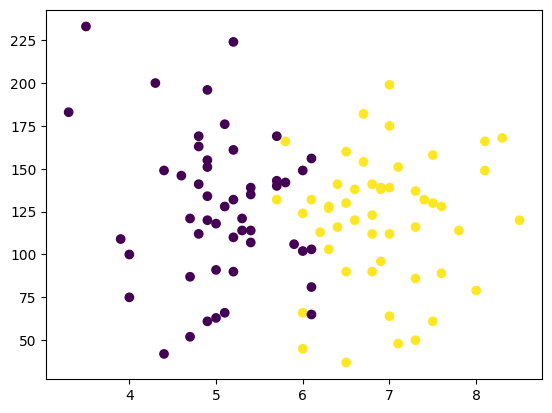

In [23]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [24]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [25]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [31]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_pred=clf.predict(X_test)

In [33]:
y_test

,placement
7,0
69,1
77,1
61,1
70,1
1,0
36,0
0,1
11,1
86,0


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.95

<Axes: >

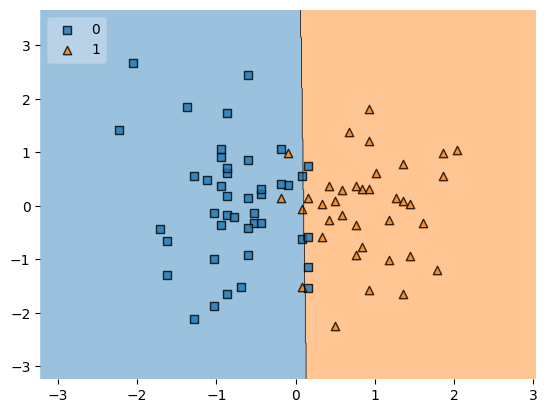

In [37]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)